In [202]:
import pandas as pd

train_data = pd.read_csv("Data/train.csv",index_col='PassengerId')
test_data = pd.read_csv("Data/test.csv",index_col='PassengerId')

In [203]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [204]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [205]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [206]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [207]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [208]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [210]:
def bar_char(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))
    

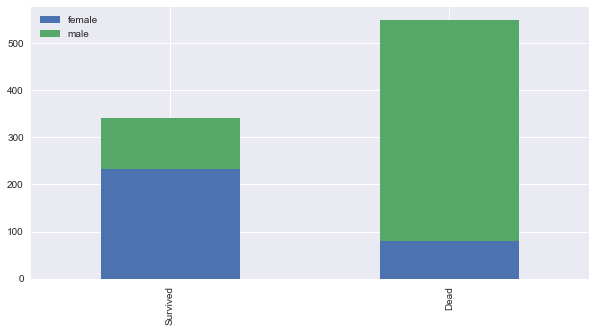

In [211]:
bar_char('Sex')

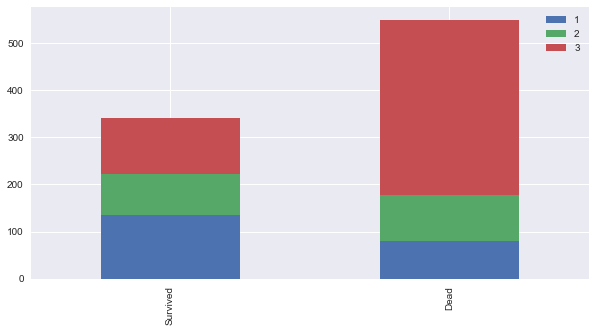

In [212]:
bar_char('Pclass')

# make changes in data

In [213]:
train_test_data = [train_data, test_data]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [214]:
title_mapping  = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [215]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [216]:
train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"), inplace=True)
test_data["Age"].fillna(test_data.groupby("Title")["Age"].transform("median"), inplace=True)

In [217]:
train_data["Fare"].fillna(train_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_data["Fare"].fillna(test_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [218]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
    
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}

for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)
    
train_data["Cabin"].fillna(train_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_data["Cabin"].fillna(test_data.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [219]:
train_data["Cabin"].unique()

array([2. , 0.8, 1.6, 1.8, 2.4, 1.2, 0. , 0.4, 2.8])

In [220]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2.0,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0.8,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2.0,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0.8,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2.0,S,0


In [221]:
for  dataset  in  train_test_data :
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [222]:
train_cols = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin', 'Embarked','Title']
x_data = train_data[train_cols]
y_data = train_data['Survived']
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,7.2500,2.0,S,0
2,1,female,38.0,1,0,71.2833,0.8,C,2
3,3,female,26.0,0,0,7.9250,2.0,S,1
4,1,female,35.0,1,0,53.1000,0.8,S,2
5,3,male,35.0,0,0,8.0500,2.0,S,0


In [227]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.3)

In [232]:
x_test.shape

(268, 9)

# train :v

In [180]:
import tensorflow as tf

In [233]:
x_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Title'],
      dtype='object')

In [264]:
# Numeric
Pclass = tf.feature_column.numeric_column('Pclass')
Age = tf.feature_column.numeric_column('Age')
SibSp = tf.feature_column.numeric_column('SibSp')
Parch = tf.feature_column.numeric_column('Parch')
Fare = tf.feature_column.numeric_column('Fare')
Cabin = tf.feature_column.numeric_column('Cabin')
Title = tf.feature_column.numeric_column('Title')

#categorical
Sex = tf.feature_column.categorical_column_with_vocabulary_list('Sex',['Male','Female'])
Embarked = tf.feature_column.categorical_column_with_vocabulary_list('Embarked',['S', 'C', 'Q'])

embedded_Sex = tf.feature_column.embedding_column(Sex,dimension=4)
embedded_Embarked = tf.feature_column.embedding_column(Embarked,dimension=4)

In [265]:
feat_cols = [Pclass,Age,SibSp,Parch,Fare,Cabin,Title,embedded_Sex,embedded_Embarked]

In [287]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,
                                                 y=y_train,
                                                 batch_size=10,
                                                 num_epochs=1000,
                                                 shuffle=True)

In [288]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[9,9,9],feature_columns=feat_cols,n_classes=2)

In [289]:
dnn_model.train(input_fn=input_func,steps=10000)

In [290]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                     y=y_test,
                                                     batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [327]:
dnn_model.evaluate(eval_input_func)

{'accuracy': 0.8022388,
 'accuracy_baseline': 0.5970149,
 'auc': 0.84513885,
 'auc_precision_recall': 0.8309168,
 'average_loss': 0.4915029,
 'global_step': 10000,
 'label/mean': 0.40298507,
 'loss': 4.8786216,
 'precision': 0.79569894,
 'prediction/mean': 0.36253417,
 'recall': 0.6851852}

In [330]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,
434,3,male,17.0,0,0,7.125,2.0,S,0
17,3,male,2.0,4,1,29.125,2.0,Q,3
197,3,male,30.0,0,0,7.750,2.0,Q,0
773,2,female,57.0,0,0,10.500,1.6,S,2
531,2,female,2.0,1,1,26.000,1.8,S,1


In [331]:
dd = test_data[train_cols]

In [352]:
dd.shape

(418, 9)

In [345]:
input_predict_func = tf.estimator.inputs.pandas_input_fn(x=dd,
                                                         batch_size=10,
                                                         num_epochs=1,
                                                         shuffle=False)

In [346]:
final_l=[]
for l in dnn_model.predict(input_fn=input_predict_func):
    final_l.append(l['class_ids'][0]) 

In [351]:
len(final_l)

418

In [348]:
final_l[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

In [344]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test,final_l))

             precision    recall  f1-score   support

          0       0.81      0.88      0.84       160
          1       0.80      0.69      0.74       108

avg / total       0.80      0.80      0.80       268



In [353]:
dd.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,
892,3,male,34.5,0,0,7.8292,2.0,Q,0
893,3,female,47.0,1,0,7.0000,2.0,S,2
894,2,male,62.0,0,0,9.6875,2.0,Q,0
895,3,male,27.0,0,0,8.6625,2.0,S,0
896,3,female,22.0,1,1,12.2875,2.0,S,2


In [354]:
submission = pd.DataFrame({
    "PassengerId":dd.index,
    "Survived": final_l
    
})
submission.to_csv("submit.csv",index=False)

In [356]:
submission = pd.read_csv("submit.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# improve the model !!

In [357]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2)

In [369]:
feat_cols = [Pclass,Age,SibSp,Parch,Fare,Cabin,Title,embedded_Sex,embedded_Embarked]

input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,
                                                 y=y_train,
                                                 batch_size=6,
                                                 num_epochs=10000,
                                                 shuffle=True)

In [370]:
estimator = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

In [374]:
estimator.train(input_fn=input_func,steps=100000)

In [375]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                     y=y_test,
                                                     batch_size=6,
                                                     num_epochs=1,
                                                     shuffle=False)

In [376]:
estimator.evaluate(eval_input_func)

{'accuracy': 0.7821229,
 'accuracy_baseline': 0.69273746,
 'auc': 0.82397366,
 'auc_precision_recall': 0.6732883,
 'average_loss': 0.51946634,
 'global_step': 110000,
 'label/mean': 0.30726257,
 'loss': 3.0994825,
 'precision': 0.6333333,
 'prediction/mean': 0.41154322,
 'recall': 0.6909091}

In [377]:
input_predict_func = tf.estimator.inputs.pandas_input_fn(x=dd,
                                                         batch_size=10,
                                                         num_epochs=1,
                                                         shuffle=False)
final_l=[]
for l in estimator.predict(input_fn=input_predict_func):
    final_l.append(l['class_ids'][0]) 
    
submission = pd.DataFrame({
    "PassengerId":dd.index,
    "Survived": final_l
    
})
submission.to_csv("submit_improved.csv",index=False)

submission = pd.read_csv("submit.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
